In [17]:
import seaborn as sns
import numpy as np
import glob
import os
import pandas as pd

base_dir = os.path.expanduser("~/projects/nanochat")
results_path = os.path.join(base_dir, 'report')

In [18]:
results_path

'/Users/geoffstanley/projects/nanochat/report'

In [52]:
def read_reports(path):
    print(path)
    labels = []
    scores = []
    models = []
    for report in glob.glob(os.path.join(path, "mistakes*")):
        model = "with_mistakes" if "yes" in report else "no_mistakes"
        with open(report) as f:
            for i, line in enumerate(f):
                if i > 2:
                    s = line.split(' ')
                    if len(s) > 2:
                        label = s[1].removesuffix(":")
                        if label in {"ARC-Easy", "ARC-Challenge", "MMLU", "HumanEval", "SpellingBee"}:
                            labels.append(label)
                            scores.append(s[2].removesuffix("\n"))
                            models.append(model)
    
    return labels, scores, models
                    
labels, scores, models = read_reports(results_path)
df = pd.DataFrame({'label': labels, 'score': scores, 'model': models})
df.score = df.score.astype(float)

/Users/geoffstanley/projects/nanochat/report


<Axes: xlabel='model', ylabel='score'>

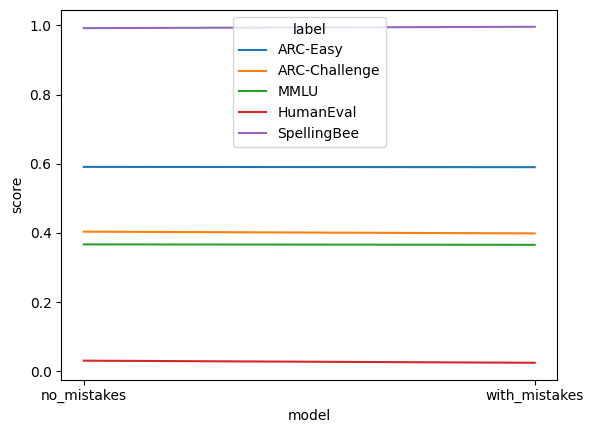

In [ ]:
sns.lineplot(df, y='score', x = 'model',hue='label', style='label', dashes=False, markers=True)

In [36]:
values

['sft',
 'None',
 'bfloat16',
 '0.0000',
 '512',
 '1',
 '50',
 '8',
 'mistakes_no',
 'None',
 'None',
 '',
 '0.5909',
 '0.4036',
 '0.3668',
 '0.0305',
 '0.9922',
 'metric:',
 'sft',
 'None',
 'bfloat16',
 '0.0000',
 '512',
 '1',
 '50',
 '8',
 'mistakes_yes',
 'None',
 'None',
 '',
 '0.5901',
 '0.3985',
 '0.3655',
 '0.0244',
 '0.9961',
 'metric:']